In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data=pd.read_csv('diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
def compute_covariance(data):
    n = data.shape[0]
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return np.dot(centered_data.T, centered_data) / (n - 1)

cov_matrix = compute_covariance(X_scaled)

In [67]:
# eigen

def compute_eigen(cov_matrix):
    n = cov_matrix.shape[0]
    eigenvalues = np.zeros(n)
    eigenvectors = np.zeros((n, n))
    
    for i in range(n):
        v = np.random.rand(n) 
        v = v / np.linalg.norm(v)
        
        for _ in range(100):
            v_new = np.dot(cov_matrix, v)
            v_new = v_new / np.linalg.norm(v_new)
            if np.allclose(v, v_new):
                break
            v = v_new
        
        eigenvalues[i] = np.dot(v.T, np.dot(cov_matrix, v))
        eigenvectors[:, i] = v
    
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = compute_eigen(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.09711056 2.09711056 2.09711056 2.09711056 2.09711056 2.09711056
 2.09711056 2.09711056]
Eigenvectors:
 [[0.12843849 0.12843949 0.12843881 0.12843899 0.12843881 0.1284394
  0.12843901 0.12843854]
 [0.39308444 0.39308473 0.39308453 0.39308459 0.39308454 0.39308471
  0.39308459 0.39308445]
 [0.36000459 0.3600049  0.36000469 0.36000474 0.36000469 0.36000487
  0.36000475 0.3600046 ]
 [0.43982071 0.43982015 0.43982053 0.43982043 0.43982053 0.4398202
  0.43982041 0.43982068]
 [0.43502347 0.43502305 0.43502334 0.43502326 0.43502334 0.43502309
  0.43502325 0.43502345]
 [0.45194025 0.45194008 0.4519402  0.45194017 0.4519402  0.4519401
  0.45194016 0.45194025]
 [0.27061012 0.27060992 0.27061006 0.27061002 0.27061006 0.27060994
  0.27061002 0.27061011]
 [0.19803375 0.1980348  0.19803408 0.19803427 0.19803409 0.1980347
  0.1980343  0.1980338 ]]


In [68]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [69]:
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
k = np.argmax(cumulative_variance >= 0.95) + 1
principal_components = eigenvectors[:, :k]

X_pca = np.dot(X_scaled, principal_components)

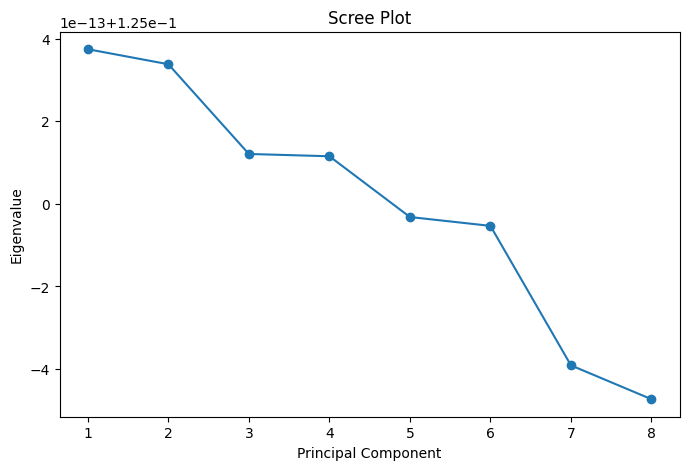

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues / sum(eigenvalues) , marker = 'o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [71]:
k = 2
selected_eigenvectors = eigenvectors[:, :k]

X_pca = X_scaled @ selected_eigenvectors

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca["Outcome"] = data["Outcome"] 
print(df_pca.head())

        PC1       PC2  Outcome
0  1.068516  1.068516        1
1 -1.121691 -1.121691        0
2 -0.396460 -0.396459        1
3 -1.115794 -1.115795        0
4  2.359311  2.359311        1


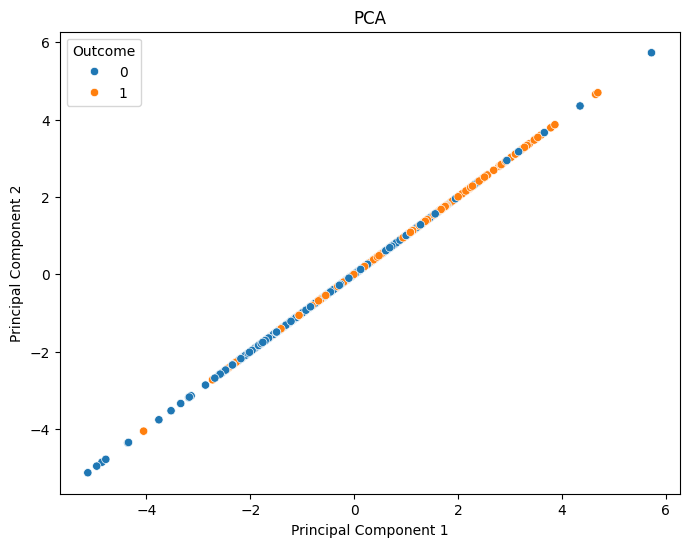

In [72]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Outcome"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA")
plt.show()